In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import load_model

In [3]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 15.90 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [4]:
X=[]
Y=[]

In [5]:
label=[]

In [6]:
for i in range (10):
  label.append(1)

In [7]:
label[0]='Tomato___healthy'
label[1]='Tomato___Tomato_mosaic_virus'
label[2]='Tomato___Tomato_Yellow_Leaf_Curl_Virus'
label[3]='Tomato___Target_Spot'
label[4]='Tomato___Spider_mites Two-spotted_spider_mite'
label[5]='Tomato___Septoria_leaf_spot'
label[6]='Tomato___Leaf_Mold'
label[7]='Tomato___Late_blight'
label[8]='Tomato___Early_blight'
label[9]='Tomato___Bacterial_spot'

In [8]:
label.sort()

In [9]:
print(label)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [10]:
a='/content/PlantVillage-Dataset/raw/color/Tomato'
c='*.*'

In [12]:
for i in range (10):
  b=label[i]
  path=os.path.join(a,b,c)
  image1= [cv2.imread(file) for file in glob.glob(path)]
  for j in range (5):
    image2 = cv2.resize(image1[j], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    X.append(image2)
    out=i
    Y.append(out)

In [13]:
len(X)

50

In [14]:
X=np.array(X)/255.0

In [15]:
Y=np.array(Y)

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_generator=train_datagen.flow_from_directory('/content/PlantVillage-Dataset/raw/color/Tomato',target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 18160 images belonging to 10 classes.


In [18]:
print(train_generator.class_indices)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [19]:
baseModel = VGG16(weights="imagenet", include_top=False,input_shape=(224,224,3))
	

58892288/58889256 [==============================] - 1s 0us/step


In [20]:
for layer in baseModel.layers:
	layer.trainable = False

In [21]:
headModel = baseModel.output
headModel = GlobalAveragePooling2D() (headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(10, activation="softmax")(headModel)

In [22]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
model.fit(train_generator,
        steps_per_epoch=500,
        epochs=10)

Epoch 1/10
500/500 [==============================] - 40s 80ms/step - loss: 1.3732 - accuracy: 0.5746
Epoch 2/10
500/500 [==============================] - 39s 78ms/step - loss: 0.7769 - accuracy: 0.7644
Epoch 3/10
500/500 [==============================] - 39s 78ms/step - loss: 0.5966 - accuracy: 0.8182
Epoch 4/10
500/500 [==============================] - 39s 78ms/step - loss: 0.5056 - accuracy: 0.8405
Epoch 5/10
500/500 [==============================] - 39s 78ms/step - loss: 0.4533 - accuracy: 0.8586
Epoch 6/10
500/500 [==============================] - 39s 79ms/step - loss: 0.4143 - accuracy: 0.8666
Epoch 7/10
500/500 [==============================] - 39s 78ms/step - loss: 0.3884 - accuracy: 0.8726
Epoch 8/10
500/500 [==============================] - 39s 78ms/step - loss: 0.3648 - accuracy: 0.8818
Epoch 9/10
500/500 [==============================] - 39s 78ms/step - loss: 0.3420 - accuracy: 0.8885
Epoch 10/10
500/500 [==============================] - 39s 78ms/step - loss: 0.324

In [26]:
#model.save('model.h5')

In [27]:
#model=load_model('model.h5')

In [28]:
model.evaluate(X,Y)

2/2 [==============================] - 1s 264ms/step - loss: 0.7433 - accuracy: 0.6800


[0.743308961391449, 0.6800000071525574]

In [29]:
p=model.predict(X)

In [30]:
s=13

In [31]:
pred=p[s]
print(pred)

[1.7409424e-03 1.4408711e-01 7.8741682e-01 3.1116423e-03 6.9758692e-03
 8.7074013e-03 4.7743414e-02 1.9349836e-04 1.9700337e-06 2.1319831e-05]


In [32]:
m1=np.argmax(pred)
l1=label[m1]
print('prediction :',l1)

prediction : Tomato___Late_blight


In [33]:
m2=Y[s]
l2=label[m2]
print('actual :',l2)

actual : Tomato___Late_blight


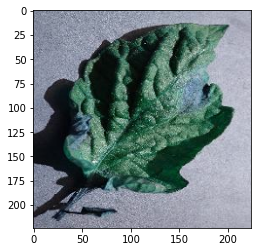

In [34]:
plt.imshow(X[s])